<a href="https://colab.research.google.com/github/nahidhasan2010/Research-Paper/blob/main/Facial_emotion_recognization_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# GPU check
import tensorflow as tf, platform
print("TF:", tf.__version__)
print("Python:", platform.python_version())
print("GPU available:", len(tf.config.list_physical_devices('GPU'))>0)

TF: 2.19.0
Python: 3.11.13
GPU available: True


In [ ]:
!nvidia-smi

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Set paths for dataset and outputs
BASE = "/content/drive/MyDrive/fydp"
PATH_FACES = f"{BASE}/faces_dataset/Autistic Children Emotions - Dr. Fatma M. Talaat"
PATH_OUT = f"{BASE}/outputs"


Mounted at /content/drive


In [4]:
import tensorflow as tf

# Define image size and batch size
IMG_SIZE = (64, 64)  # Resize images
BATCH_SIZE = 32

# Load dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    f"{PATH_FACES}/Train", image_size=IMG_SIZE, batch_size=BATCH_SIZE, label_mode="categorical", seed=1337)

test_ds = tf.keras.utils.image_dataset_from_directory(
    f"{PATH_FACES}/Test", image_size=IMG_SIZE, batch_size=BATCH_SIZE, label_mode="categorical", seed=1337)

# Class names for later reference
class_names = train_ds.class_names

Found 763 files belonging to 6 classes.
Found 75 files belonging to 6 classes.


In [5]:
AUTOTUNE = tf.data.AUTOTUNE

# Apply cache and prefetch
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
test_ds = test_ds.cache().prefetch(AUTOTUNE)

In [6]:
from tensorflow.keras import layers, models

# Create the model
model = models.Sequential([
    layers.InputLayer(input_shape=(64, 64, 3)),  # Input layer for 64x64 RGB images
    layers.Rescaling(1./255),  # Normalize pixel values
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,974 (2.61 MB)

 Trainable params: 683,974 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(train_ds, validation_data=test_ds, epochs=8)

# Save the model
model.save(f"{PATH_OUT}/faces_asd_cnn.h5")

Epoch 1/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 184s 842ms/step - accuracy: 0.3443 - loss: 1.5624 - val_accuracy: 0.5600 - val_loss: 1.4064
Epoch 2/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4449 - loss: 1.5100 - val_accuracy: 0.5600 - val_loss: 1.3999
Epoch 3/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4658 - loss: 1.4801 - val_accuracy: 0.5600 - val_loss: 1.3822
Epoch 4/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4633 - loss: 1.4394 - val_accuracy: 0.5600 - val_loss: 1.3987
Epoch 5/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4652 - loss: 1.4582 - val_accuracy: 0.5600 - val_loss: 1.4379
Epoch 6/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4808 - loss: 1.4555 - val_accuracy: 0.5600 - val_loss: 1.3894
Epoch 7/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4767 - loss: 1.4481 - val_accuracy: 0.5600 - val_loss: 1.3767
Epoch 8/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4721 - loss: 1.4171 - val_accuracy: 0.5600 - val_loss: 1.3

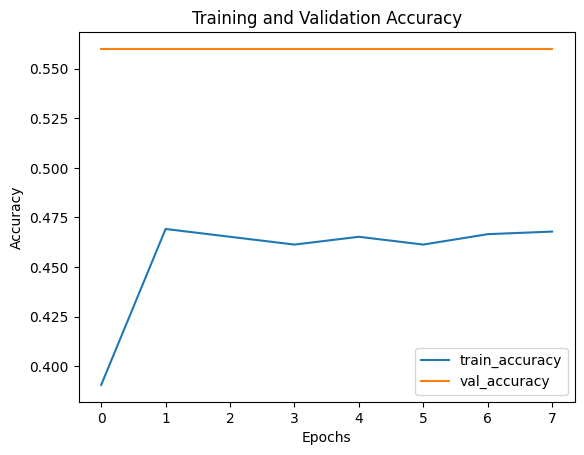

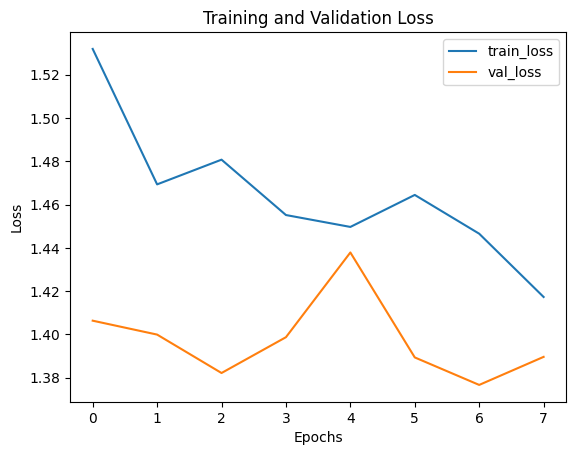

In [8]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(f"{PATH_OUT}/faces_asd_accuracy.png")
plt.show()

# Plot loss
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f"{PATH_OUT}/faces_asd_loss.png")
plt.show()

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get model predictions on the test set
y_true, y_pred = [], []
for x, y in test_ds.unbatch().batch(1):
    preds = model.predict(x)
    y_pred.append(np.argmax(preds))
    y_true.append(np.argmax(y.numpy()))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
